# Last FM API (Music)

Spotify's API is dead to us, so we're using Last.fm's - it's still music, just not as nice of an API.

1. Create an account at https://www.last.fm/api/
2. Create an "application" to get a key: https://www.last.fm/api/account/create
    - It isn't a real application, it's just your project
    - Name/description doesn't matter, ignore callback key and callback url
3. And save the API key that shows up on the next screen

You can find documentation at https://www.last.fm/api/

The domain for the API is `http://ws.audioscrobbler.com`, so all of your endpoints will be connected to that. To test your API key, check the following URL in your browser: `http://ws.audioscrobbler.com/2.0/?method=artist.search&artist=cher&api_key=XXXXXXXXXXXXXXXXXXXX&format=json` (change the `XXXXXX` to be your API key, of course!).

> Last.fm used to be called **AudioScrobbler**, which is why its URLs don't have "last.fm" in them.
> While we're asking about URLs, notice that the API endpoints have a lot of `?` and `&` in them - these are key/value pairs, kind of like dictionaries, but for URLs instead of Python.

# FIRST: SETUP

## 1) Import the libraries/packages you might need

We need a library to read in the data for us! We don't like `urllib2`, so it must be something cooler and better.

In [1]:
# Run this cell even though I already typed in it! You need to import something, too
import matplotlib

%matplotlib inline

In [2]:
# Import what you need here
import requests



## 2) Save your API key

Write your API key here so you don't forget it - it's the "api key" one, not the "shared secret" one

In [3]:
apikey = '0f7bf585480b3371fee96d2ef9384482'

## 3) A new function! Just run the code below. DO NOT EDIT IT.

After you run this cell, you'll have a new function that you can use to display images.

In [4]:
import urllib
from IPython.display import display, Image
from IPython.core.display import HTML 


def display_image(url):
    response = urllib.request.urlopen(url).read()
    img = Image(response, width=200)
    display(img)

All you need to do to display an image is use `display_image` and send it a string, just like this:

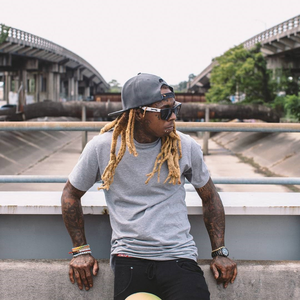

In [5]:
display_image("https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png")

# NOW: YOUR ASSIGNMENT

## 1) Search for and print a list of 50 musicians with `lil` in their name, along with the number of listeners they have

There are a lot of musicians with "Lil" in their name - it used to be all Lil Wayne and Lil Kim, but we live in a new world now!

- *Tip: Remember, the domain for the API is `http://ws.audioscrobbler.com`*
- *Tip: Make sure you ask the API for 50 musicians! This involves adding another parameter to the URL - notice they all have a `&` before them. [Read the documentation](http://www.last.fm/api/show/artist.search) to find the parameter's name.* 
- *Tip: When you are looking at any piece of data - is it a dictionary? Look at the keys! Is it a list? Look at the first element!*
- *Tip: LOOK AT THE KEYS. and then the other keys and the other keys and the other keys. It's an ugly series of dictionaries!*

In [6]:
base_endpoint = 'http://ws.audioscrobbler.com'

def get_artist_search_string(artistname, limit=''):
  return '/2.0/?method=artist.search&artist={}&limit={}&format=json&api_key={' \
         '}'.format(artistname, limit, apikey)


In [7]:
artist_search_response = requests.get(base_endpoint + get_artist_search_string('lil',
                                                                               50)).json()
artist_search_response.keys()
artists = artist_search_response['results']['artistmatches']['artist']

In [12]:
for artist in artists:
  print('{name} has {listeners} listeners'.format(**artist))
  

Lil' Wayne has 3139798 listeners
Lily Allen has 2118111 listeners
LIL UZI VERT has 224067 listeners
LIL PEEP has 87677 listeners
Lil B has 206072 listeners
Lilly Wood & The Prick has 380219 listeners
Lil Ugly Mane has 44862 listeners
Lil Yachty has 114711 listeners
Lil' Kim has 444193 listeners
Lil Pump has 137191 listeners
Lil Jon has 591970 listeners
Lil Dicky has 144179 listeners
Lil Jon & The East Side Boyz has 493048 listeners
Lil Boosie has 419402 listeners
Lila Downs has 159067 listeners
The Tiger Lillies has 108955 listeners
Lil Wyte has 256299 listeners
lil Xan has 63539 listeners
Birdman & Lil' Wayne has 585654 listeners
Lil' Flip has 326651 listeners
Lil Skies has 43660 listeners
Lil Durk has 59786 listeners
Spangle call Lilli line has 30851 listeners
Lily & Madeleine has 119083 listeners
Lil' Kleine has 42957 listeners
Lillasyster has 49160 listeners
Lilu has 35954 listeners
The Lillingtons has 37069 listeners
Lilys has 56460 listeners
Lil' Scrappy has 257147 listeners
Mash

Your results should begin something like this:
    
```
Lil' Wayne has 3086628 listeners
Lily Allen has 2074266 listeners
Lil B has 194116 listeners
Lilly Wood & The Prick has 359886 listeners
Lil Ugly Mane has 31955 listeners
LIL UZI VERT has 88517 listeners
```

## 2) How many listeners does your list have in total?

Make sure you have 50 artists instead of 30 artists.

- *Tip: What's the data type of the `listeners` count? It's going to cause a problem!*
- *Tip: If you were crazy you could use sum and a list comprehension. But you really don't have to!*

## 3) Show each artist's name and extra-large image

Because you ran the code in setup, you now have a function called `display_image` that you can use to display an image if you give it a URL as a string. For example, I have this image and want to display it. I just send a string URL to the `display_image` method.

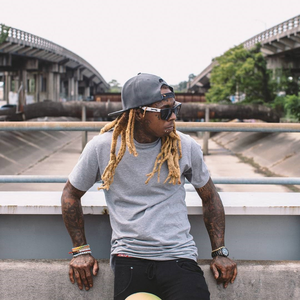

In [9]:
display_image("https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png")

Each artist **has a list of images of different sizes**. We're interested in the second-to-last one, where `size` is `extralarge`. Print their name and use `display_image` to display their extra-large image.

- *Tip: The URL should look like this: `https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png`*
- *Tip: You can always assume it's the second to the last, or assume it's `extralarge`, or whatever you want to do to find it.*
- *Tip: Make sure the URL is correct before you try to display it.*

## 4) Find Lil Jon's `mbid` (or anyone else's!).

Oftentimes in an API, you can do a few things: you can **search** for items, and you can **see more information** about items. To find more information about the item, you need to use their **unique id**. In this dataset, it's called an `mbid` (MusicBrainz, I think - another company associated with last.fm!).

Go through the artists and print their **name and mbid**. Find Lil Jon's `mbid`. I *wanted* Lil Uzi Vert's, but for some reason it isn't there. Then I wanted us to look at Lily Allen's, but I just couldn't bring myself to do that. If you'd rather do someone else, go for it.

## 5) Find the artist's name and bio using their `mbid`.

If you look at the [last.fm documentation](http://www.last.fm/api/show/artist.getInfo), you can see how to use the artist's `mbid` to find more information about them. Print **every tag associated with your artist**.

- *Tip: It's a new request to the API*
- *Tip: Use the `mbid`, and make sure you delete the `&name=Cher` from the sample endpoint*
- *Tip: If you use `print` for the bio it looks a little nicer than it would otherwise*

## 6) Print every tag of that artist

# GETTING A LITTLE CRAZY

So you know your original list of musicians? I want to get tag data for ALL OF THEM. How are we going to do that?

## 7) Find the mbids (again)

If we have a musician with an mbid of `AAA-AAA-AAA`, we get their info from a url like `http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=AAA-AAA-AAA`.

|artist|url|
|---|---|
|`AAA-AAA-AAA`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=AAA-AAA-AAA`|
|`BBB-BBB-BBB`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=BBB-BBB-BBB`|
|`CCC-CCC-CCC`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=CCC-CCC-CCC`|

I guess we should start trying to get a list of all of the mbids.

**Loop through your artists, and print out the `mbid` for each artist**

- *Tip: You probably need to request your artist search result data again, because you probably saved over `data` with your other API request. Maybe call it `artist_data` this time?*
- *Tip: If the artist does NOT have an `mbid`, don't print it.

Your results should look something like

```
6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
1550f952-c91b-40d7-9b4d-d26a259ee932
1b72331b-3a97-4981-a81c-eeee9c275d28
5f1adfe1-4d07-4141-b181-79e5d379d539
a95384b1-6aec-468c-ae0d-8c6daf87c4c2
bc1b5c95-e6d6-46b5-957a-5e8908b02c1e
243c6f61-d83b-4459-bebd-5899df0da111
```

## 8) Saving those mbids

For those `mbid` values, instead of printing them out, save them to a new list of just mbid values. Call this list `mbids`.

- *Tip: Use `.append` to add a single element onto a list*

Your results should look something like

```['6e0c7c0e-cba5-4c2c-a652-38f71ef5785d',
 '1550f952-c91b-40d7-9b4d-d26a259ee932',
 '1b72331b-3a97-4981-a81c-eeee9c275d28',
 '5f1adfe1-4d07-4141-b181-79e5d379d539',
 'a95384b1-6aec-468c-ae0d-8c6daf87c4c2',
 'bc1b5c95-e6d6-46b5-957a-5e8908b02c1e',
 '243c6f61-d83b-4459-bebd-5899df0da111',
 '8ba17cf6-bec2-4ae4-9820-b1cda47adc08',
 'ad29ae1c-2eda-4071-9dc8-31910e7e546c',
 '3268f062-6e76-480a-a384-e1dd2a276afb',
 '3ad4f6ec-253f-4050-8849-ca26266edfb8',
 '9b5ce0c1-1bc0-4ea2-a8d3-f5ee7af9eda8',
 '981d39fc-bd00-4cc6-ac67-6410f8b89098',
 'b89f4c50-72f5-48ce-b08c-a643b191b24f',
 'bc21df5c-3d79-479b-b638-8ddb5ecea403',
 'c9cd225b-4883-428e-82c2-73e0b6282fb6',
 '9acaf734-b380-4c48-954c-a2cf1d7990a9',
 'd4d5ae85-700c-4a55-8a39-7f923da07ef2',
 '77fafce8-a32f-4d42-bdce-266bbf913cee',
 '50ad1cde-1536-4268-a55f-e47a7b8280ab',
 '9803d120-716d-45ba-9eb7-9a120813f908',
 'b27560ea-2783-4a91-be45-9e8711917562',
 '194e87c9-b3fe-4fbd-82a7-8c54b4dd4c76',
 'fd90af91-ed07-4e85-8816-26c954fe5286',
 '5652bb3e-f225-49de-9637-5aa1539b4a7c']```

## 9) Printing our API urls

To get tag data for each artist, you need to use those `mbid` values to access their artist page on the API. Loop through the mbids, displying the URL you'll need to access.

- *Tip: You don't want to use a comma when printing, because commas add spaces into your text and URLs can't have that*
- *Tip: Make sure your URL has `artist.getinfo` in it - if not, you're using the wrong endpoint.*

Your results should look something like

```http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=1550f952-c91b-40d7-9b4d-d26a259ee932
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=1b72331b-3a97-4981-a81c-eeee9c275d28
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=5f1adfe1-4d07-4141-b181-79e5d379d539
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=a95384b1-6aec-468c-ae0d-8c6daf87c4c2
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=bc1b5c95-e6d6-46b5-957a-5e8908b02c1e```

## OKAY HERE IS A LITTLE INFORMATION: Using our API urls

This time instead of just *displaying* the URL, we're going to *request and process it*. **But first I'm going to teach you something.**

When you're dealing with an API, you don't want to make a million requests, have bad code, and then need to do those million requests again. It's usually best to test your code with a few of the results first.

So, if we have a list of numbers like this:

In [10]:
numbers = [4, 5, 6, 7]
numbers

[4, 5, 6, 7]

You can actually say to Python, **give me the first two**, and it will only give you the first two.

In [11]:
numbers[:2]

[4, 5]

The is **very convenient** with loopng with APIs, because instead of trying to use all FIFTY artists, you can just say "hey, please try this out with 2 of them" and you don't waste time.

## 10) Using the first three `mbids`, request the API urls and print the artist's name.

You built the URLs in the last question, now it's time to use them! Use `requests` etc to grab the URL and get out the artist's name.

- *Tip: The code is the same as last time you got an artist's name from their info page, it's just going to be inside of a loop*
- *Tip: USE `PRINT` TO SEE WHAT YOU ARE LOOKING AT!!!!!*

## 11) Using the first three `mbids`, request the API urls and print the artist's name and their tags

- *Tip: The code is the same as last time you got an artist's name from their info page, it's just going to be inside of a loop*
- *Tip: It's a for loop in a for loop!*

## 12) Using the first ten mbids, print the artist's name and whether they're a rapper

Only print their name ONCE and only print whether they are hip hop or not ONCE.

- *Tip: Rap tags include hip hop, swag, crunk, rap, dirty south, and probably a bunch of other stuff! You can include as many categories as you'd like.*
- *Tip: You can use `2 in [1, 2, 3]` to find out if `2` is in the list of `[1, 2, 3]`.*
- *Tip: Every time you look at a new artist, you can say they are NOT a rapper. And once you find out one of their tags is hip hop or rap, then you can note that they're a rapper. Then once you're done looking at their tags, then you can say HEY this is a rapper, or HEY this is not a rapper.*

Your results might look something like

```ARTIST: Lily Allen
NO hip hop
ARTIST: Lil B
YES hip hop
ARTIST: Lilly Wood & The Prick
NO hip hop
ARTIST: Lil Ugly Mane
YES hip hop
ARTIST: Lil Jon
YES hip hop
ARTIST: Lil' Kim
YES hip hop
ARTIST: Lil Jon & The East Side Boyz
YES hip hop
```

## 13) What percent of "lil" results are rappers?

## 14) Seriously you are all-powerful now.